In [3]:
import os
os.chdir('/Users/jooranlee/Library/CloudStorage/OneDrive-HKUSTConnect/1-2/CSIC5100/HW2') 

### Question 1

In [13]:
import scipy.io
import numpy as np

data = scipy.io.loadmat('snp452-data.mat')
X = np.array(data['X'])
Y = np.log(X) #taking log (Q1-a)
print(Y.shape)
deltaY = Y[1:] - Y[:-1] # (Q1-b)
print(deltaY.shape)
t = deltaY.shape[0]
dim = deltaY.shape[1]
sigma_hat = np.cov(deltaY.T) #contructing Cov Matrix (Q1-c)
print(sigma_hat.shape)
eig_val,_ = np.linalg.eig(sigma_hat) #computing eigen values 
eig_val= np.sort(eig_val.astype('float64'))[::-1] # (Q1-d)

R = 100
N_full = np.zeros(eig_val.shape)
for i in range(R):
    deltaY_per = np.zeros(deltaY.shape)
    idx = np.array([np.arange(t)]+[np.random.permutation(t) for i in range(dim-1)])
    #print(idx.shape)
    for j in range(dim):
        deltaY_per[:,j] = deltaY[:,j][idx[j]]
    sigma_hat_per = np.cov(deltaY_per.T)
    eig_val_per,_ = np.linalg.eig(sigma_hat_per)
    eig_val_per= np.sort(eig_val_per.astype('float64'))[::-1]
    N = ((eig_val-eig_val_per)<0).astype('float64')
    N_full+=N
N_full+=1
N_full/=R+1
print(N_full) #Horn's Parallel analysis (Q1- e)
# it seems that k = 14 (p-val gets > 0.05 from 14th value)

(1258, 452)
(1258, 452)
(1257, 452)
(452, 452)
[0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.14851485 0.14851485 0.14851485 0.4950495  0.6039604
 0.85148515 0.96039604 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         

### Question2 (d)

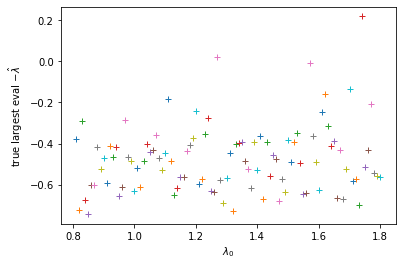

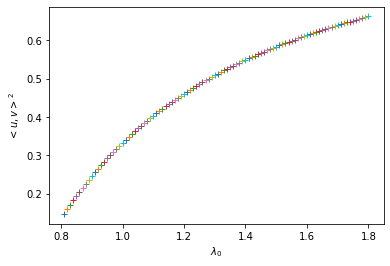

In [8]:
#Q2(d)
import matplotlib.pyplot as plt
lambda0=0.8

for i in range(100):
    
    # Initialization
    lambda0 = lambda0 + 1/100
   
    gamma = 1/2
    n = int(400)  # number of samples
    p = int(n * gamma*gamma)  # dimension
    u = np.ones((p,1))/np.sqrt(p)  # np.linalg.norm(u) = 1

    sigma = lambda0 * np.dot(u,u.T) + np.identity(p)
    mean = np.zeros((p))


    #Sampling
    X = np.random.multivariate_normal(mean=mean, cov=sigma, size=n).T  # shape of X: (p,n)


    # Compute sample covariance matrix and its eigenvalues & eigenvectors
    cov_mat = np.dot(X,X.T)/n
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

    # Rearrange them in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # the index of eigenvalues in descending order

    desc_evals = eigenvalues[sorted_indices]  # eigenvalues in descending order
    desc_evecs = eigenvectors[:,sorted_indices]  # eigenvectors in descending order


    # Compute largest eigenvalue and its associated eigenvector using methods in (a) and (c)
    lamda_hat = (1+lambda0) * (1+gamma/lambda0)
    u_v_inner_prod=(1-gamma/(lambda0*lambda0)) / (1+gamma/lambda0)
    

    
    # plot
    
    # difference of true largest eigenvalue of computed eigenvalue
    plt.figure(1)
    plt.xlabel('$\lambda_0$')
    plt.ylabel('true largest eval $-\hat{\lambda}$')
    plt.plot(lambda0, desc_evals[0]-lamda_hat, marker = '+', linestyle = '')
    
    # inner product of u and v
    plt.figure(2)
    plt.xlabel('$\lambda_0$')
    plt.ylabel('$<u,v>^2$')
    plt.plot(lambda0, u_v_inner_prod, marker = '+', linestyle = '')
plt.show()